In [465]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
# Always make it pretty.
plt.style.use('ggplot')
# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup
import datetime

In [2]:
file = pd.read_csv('data/Collisions.csv')

In [611]:
infl = file[((file['UNDERINFL'] == 'Y') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['FATALITIES'] > 0))].shape[0]
drunkdracc = file[((file['UNDERINFL'] == 'Y') | (file['UNDERINFL'] == '1'))].shape[0]
print('drunk driving deaths / drunk driving accidents: ',(infl/drunkdracc))

nondrunkdrivingacccsdeath = file[((file['UNDERINFL'] == 'N') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['FATALITIES'] > 0))].shape[0]
nondrunkdrivingacc = file[(file['UNDERINFL'] == 'N') | (file['UNDERINFL'] == '0')].shape[0]
print('non drunk driving deaths / non drunk driving accidents: ',(nondrunkdrivingacccsdeath/nondrunkdrivingacc))


drunk driving deaths / drunk driving accidents:  0.00966183574879227
non drunk driving deaths / non drunk driving accidents:  0.001267120201838169


In [612]:
seriousinjury = file[((file['UNDERINFL'] == 'Y') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print('serious injury driving accidents invoving drunk / drunk driving accidents: ',seriousinjury/drunkdracc)

seriousinjurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print('serious injury driving accidents not involving drunk/ non drunk driving accidents: ',seriousinjurynondrunk/nondrunkdrivingacc)

serious injury driving accidents invoving drunk / drunk driving accidents:  0.04487385936661299
serious injury driving accidents not involving drunk/ non drunk driving accidents:  0.014276220940710039


In [11]:
injury = file[((file['UNDERINFL'] == 'Y') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['INJURIES'] > 0))].shape[0]
injurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['INJURIES'] > 0))].shape[0]
totalinjury = file[file['INJURIES'] > 0].shape[0]
print(injury/totalinjury)
print(injury/drunkdracc)
print(injurynondrunk/nondrunkdrivingacc)

0.06567435901758172
0.41825013419216317
0.3051563344746801


In [12]:
print('car accidents involving drunk driver that injury someone',injury)
print('car accidents involving non drunk driver that injury someone',injurynondrunk)
print('car accidents involving drunk driver',drunkdracc)
print('car accidents involving sober driver',nondrunkdrivingacc)
denominator = drunkdracc * nondrunkdrivingacc 
numerator = drunkdracc + nondrunkdrivingacc

car accidents involving drunk driver that injury someone 3896
car accidents involving non drunk driver that injury someone 54186
car accidents involving drunk driver 9315
car accidents involving sober driver 177568


In [13]:

#file['ST_COLCODE'] = pd.to_numeric(file[file.ST_COLCODE.notnull()])
file['ST_COLCODE'] = pd.to_numeric(file['ST_COLCODE'],errors = 'coerce')
print(file[(file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 10)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['SERIOUSINJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['SERIOUSINJURIES'] > 0) & (file['ST_COLCODE'] >= 10)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['INJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['INJURIES'] > 0) & (file['ST_COLCODE'] >= 10)].groupby('ST_COLCODE').count()['X'].sum())

115
191
823
2050
6673
50121


In [87]:
file2 = file.copy()

In [64]:
file2.to_pickle('data/CollionsWDatetime.pkl.bz2', compression = 'bz2')

In [83]:
def datetimeconversion(row):
    try:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y %I:%M:%S %p')
    except:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y')

In [91]:
file2['INCDTTM']=file2.apply(datetimeconversion, axis=1)


<class 'pandas._libs.tslib.Timestamp'>


In [226]:
def getweather():
url = 'https://api.darksky.net/forecast/'
with open('data/dark_sky.txt', 'r') as file:
    key = file.read()
latlong = '/47.44472,-122.31361,'
for i in range(5683): #5682 is number of days from beg to end
    time = 1389346020 + (i*24*60*60)
    strtime = str(time)
    finalurl= url+key+latlong+strtime
    r = requests.get(finalurl)
    dic = json.loads(r.content)
    Weather.insert_one(dic)
 
    

In [292]:
Weather.find_one()

{'_id': ObjectId('5d781b8d4cadcc23e8d2595a'),
 'currently': {'apparentTemperature': 41.78,
  'cloudCover': 0.75,
  'dewPoint': 42.8,
  'humidity': 0.9,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1012.59,
  'summary': 'Mostly Cloudy',
  'temperature': 45.55,
  'time': 1389346020,
  'uvIndex': 0,
  'visibility': 10,
  'windBearing': 202,
  'windGust': 15.46,
  'windSpeed': 7.1},
 'daily': {'data': [{'apparentTemperatureHigh': 46.95,
    'apparentTemperatureHighTime': 1389394800,
    'apparentTemperatureLow': 39.39,
    'apparentTemperatureLowTime': 1389456000,
    'apparentTemperatureMax': 51.81,
    'apparentTemperatureMaxTime': 1389423600,
    'apparentTemperatureMin': 41.71,
    'apparentTemperatureMinTime': 1389348000,
    'cloudCover': 0.96,
    'dewPoint': 42.57,
    'humidity': 0.85,
    'icon': 'rain',
    'moonPhase': 0.35,
    'precipIntensity': 0.0048,
    'precipIntensityMax': 0.03,
    'precipIntensityMaxTime': 1389409200

In [93]:
def getprecipitation(Weather):
    times = Weather.find({})
    info = dict()
    for time in times:
        for i in range(len(time['hourly']['data'])):
            t = time['hourly']['data'][i]['time']
            try: 
                rain = time['hourly']['data'][i]['precipIntensity']
            except:
                continue
            dt = datetime.datetime.utcfromtimestamp(t)-datetime.timedelta(hours=8)
            info[dt] = rain
    return info

In [99]:
rain = getprecipitation(Weather)
rainpd = pd.DataFrame.from_dict(rain, orient='index')


In [608]:
def thirtysixhoursofnorain(df,num):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] == 0:
            count += 1
        if df.iloc[i,0] != 0:
            if count >= num:
                lst.append(index)
            count = 0
    return lst
def getrainlist(df,num):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] > 0.0:
            count += 1
        if df.iloc[i,0] == 0:
            if count >= num:
                lst.append(index)
            count = 0
    return lst

In [206]:
thirtysixhourlst = thirtysixhoursofnorain(rainpd)

In [609]:
wetaccidentlst = getrainlist(rainpd,4)

In [610]:
print(len(wetaccidentlst))
print(len(thirtysixhourlst))

521
271


In [524]:
"""def getaccidentsdict(df,lst):
    diction = dict()    
    for i in lst:
        accidents = df[(df['INCDTTM'].dt.time != datetime.time(0,0)) &
                       (df['INCDTTM']>= i.to_pydatetime()) & 
                       (df['INCDTTM']< i.to_pydatetime() + datetime.timedelta(hours=1))].loc[:,'INCDTTM'].count()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
"""
def getaccidentsdict(df,lst):
    diction = dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = (
                       (df['INCDTTM']>= i.to_pydatetime()) & 
                       (df['INCDTTM']< i.to_pydatetime() + datetime.timedelta(hours=1))).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
    return diction
def getdrydrivingdict(df,lst):
    diction = dict()    
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = ((df['INCDTTM']< i.to_pydatetime() - datetime.timedelta(hours=2)) & 
                       (df['INCDTTM']>= i.to_pydatetime()- datetime.timedelta(hours=3))).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
    return diction
def getwetaccidentsdict(df,lst):
    diction = dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = ((df['INCDTTM']>= i.to_pydatetime()-datetime.timedelta(hours=1)) & 
                          (df['INCDTTM']< i.to_pydatetime())).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
    return diction
def severitywetaccidentsdict(df,lst,kind,timeback):
    diction = dict()
    dictionary = dict()
    count = 0
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = ((df['INCDTTM']>= i.to_pydatetime()-datetime.timedelta(hours=timeback+1)) & 
                          (df['INCDTTM']< i.to_pydatetime()-datetime.timedelta(hours=timeback)) & (df[kind] > 0)).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
            count += df[(df['INCDTTM']>= i.to_pydatetime()-datetime.timedelta(hours=timeback+1)) & 
                          (df['INCDTTM']< i.to_pydatetime()-datetime.timedelta(hours=timeback)) & (df[kind] > 0)].loc[:,kind].sum()
            dictionary[i.to_pydatetime()] = count
            count = 0
    return (diction, dictionary)

In [577]:
wetfourhourinjuriesdict = severitywetaccidentsdict(file2,wetaccidentlst,'INJURIES',0)
wetfourhourseriousinjuriesdict = severitywetaccidentsdict(file2,wetaccidentlst,'SERIOUSINJURIES',0)
wetfourhourifatalitiesdict = severitywetaccidentsdict(file2,wetaccidentlst,'FATALITIES',0)

In [578]:
print('number of accidents',sum(wetfourhourinjuriesdict[0].values()))
print('number of injuries' , sum(wetfourhourinjuriesdict[1].values()))
wetfourhoursinjuriesnumacci = list(wetfourhourinjuriesdict[0].values())
wetfourhoursinjuriesnuminjuries = list(wetfourhourinjuriesdict[1].values())
print('Serious Injuries Below')
print('number of accidents',sum(wetfourhourseriousinjuriesdict[0].values()))
print('number of injuries' ,sum(wetfourhourseriousinjuriesdict[1].values()))
print('Fatalities Below')
print('number of accidents',sum(wetfourhourifatalitiesdict[0].values()))
print('number of injuries' ,sum(wetfourhourifatalitiesdict[1].values()))

number of accidents 268
number of injuries 332
Serious Injuries Below
number of accidents 8
number of injuries 10
Fatalities Below
number of accidents 0
number of injuries 0


In [600]:
wetthirtysixhoursdict = severitywetaccidentsdict(file2,thirtysixhourlst,'INJURIES',0)
wetthirtysixhoursdictseriousinjury = severitywetaccidentsdict(file2,thirtysixhourlst,'SERIOUSINJURIES',0)
wetthirtysixhoursdictfatalities = severitywetaccidentsdict(file2,thirtysixhourlst,'FATALITIES',0)

In [601]:
print('number of accidents',sum(wetthirtysixhoursdict[0].values()))
print('number of injuries' , sum(wetthirtysixhoursdict[1].values()))
wetthirtysixhoursinjuriesnumacci = list(wetthirtysixhoursdict[0].values())
wetthirtysixinjuriesnuminjuries = list(wetthirtysixhoursdict[1].values())
print('Serious Injuries Below')
print('number of accidents',sum(wetthirtysixhoursdictseriousinjury[0].values()))
print('number of injuries' ,sum(wetthirtysixhoursdictseriousinjury[1].values()))
print('Fatalities Below')
print('number of accidents',sum(wetthirtysixhoursdictfatalities[0].values()))
print('number of injuries' ,sum(wetthirtysixhoursdictfatalities[1].values()))

number of accidents 106
number of injuries 128
Serious Injuries Below
number of accidents 7
number of injuries 7
Fatalities Below
number of accidents 1
number of injuries 1


In [602]:
drythirtysixhourdict = severitywetaccidentsdict(file2,thirtysixhourlst,'INJURIES',2)
drythirtysixhourdictseriousinjuries = severitywetaccidentsdict(file2,thirtysixhourlst,'SERIOUSINJURIES',2)
drythirtysixhourdictfatalities = severitywetaccidentsdict(file2,thirtysixhourlst,'FATALITIES',2)

In [606]:
print('number of accidents',sum(drythirtysixhourdict[0].values()))
print('number of injuries' , sum(drythirtysixhourdict[1].values()))
drythirtysixnuminjuries = list(drythirtysixhourdict[1].values())
print('Serious Injuries Below')
print('number of accidents',sum(drythirtysixhourdictseriousinjuries[0].values()))
print('number of injuries' ,sum(drythirtysixhourdictseriousinjuries[1].values()))
print('Fatalities Below')
print('number of accidents',sum(drythirtysixhourdictfatalities[0].values()))
print('number of injuries' ,sum(drythirtysixhourdictfatalities[1].values()))

number of accidents 109
number of injuries 150
Serious Injuries Below
number of accidents 3
number of injuries 3
Fatalities Below
number of accidents 0
number of injuries 0


In [604]:
df4 = welch_satterhwaithe_df(wetfourhoursinjuriesnuminjuries,wetthirtysixinjuriesnuminjuries)
test_stat4 = welch_test_statistic(wetfourhoursinjuriesnuminjuries,wetthirtysixinjuriesnuminjuries)
students4 = stats.t(df4)
pvalue4 = students4.cdf(test_stat4)
pvalue4

0.51644839841424495

In [607]:
df5 = welch_satterhwaithe_df(wetfourhoursinjuriesnuminjuries,drythirtysixnuminjuries)
test_stat5 = welch_test_statistic(wetfourhoursinjuriesnuminjuries,drythirtysixnuminjuries)
students5 = stats.t(df4)
pvalue5 = students5.cdf(test_stat4)
pvalue5

0.51644839841424495

In [613]:
wetaccidentdict = getwetaccidentsdict(file2,wetaccidentlst)

In [614]:
wetfourhours = sum(wetaccidentdict.values())
wetfourhoursvalues = wetaccidentdict.values()
wetfourhourskeys = wetaccidentdict.keys()
print(sum(wetaccidentdict.values()))
print(len(wetaccidentdict.values()))
print(np.mean(list(wetfourhoursvalues)))

788
356
2.21348314607


In [391]:
def getaccidentsperhour(df):
    dic=dict()
    for i in range(24):
        if i == 23:
            hourly = df[(df['INCDTTM'].dt.time != datetime.time(0,0)) & (df['INCDTTM'].dt.time >= datetime.time(i,0)) &
           (df['INCDTTM'].dt.time <= datetime.time(23,59))].shape[0]
            dic[i]=hourly
        else:
            hourly = df[(df['INCDTTM'].dt.time != datetime.time(0,0)) & (df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time < datetime.time(i+1,0))].shape[0]
            dic[i]=hourly
    return dic

In [392]:
hourlyaccidents = getaccidentsperhour(file2)

In [420]:
sum(list(hourlyaccidents.values()))

160819

In [448]:
afterthirtysixhourdry = getaccidentsdict(file2,thirtysixhourlst)

162

In [449]:
afterthirtysixhourrealdry = getdrydrivingdict(file2,thirtysixhourlst)

162

In [615]:
wetthirtysix = sum(afterthirtysixhourdry.values())
wetthirtysixvalues = afterthirtysixhourdry.values()
wetthirtysixkeys = afterthirtysixhourdry.keys()
print(sum(afterthirtysixhourdry.values()))
print(len(afterthirtysixhourdry.values()))
print(np.mean(list(wetthirtysixvalues)))

424
185
2.29189189189


In [616]:
drythirtysix = sum(afterthirtysixhourrealdry.values())
drythirtysixvalues = afterthirtysixhourrealdry.values()
drthirtysixkeys = afterthirtysixhourrealdry.keys()
print(sum(afterthirtysixhourrealdry.values()))
print(len(afterthirtysixhourrealdry.values()))
print(np.mean(list(drythirtysixvalues)))

312
162
1.92592592593


In [617]:
#afteroneOsixhourwet = getaccidentsdict(file2,oneOsixhourlist)
#afteroneOsixhourdry = getdrydrivingdict(file2,oneOsixhourlist)
len(thirtysixhourlst)

271

<BarContainer object of 399 artists>

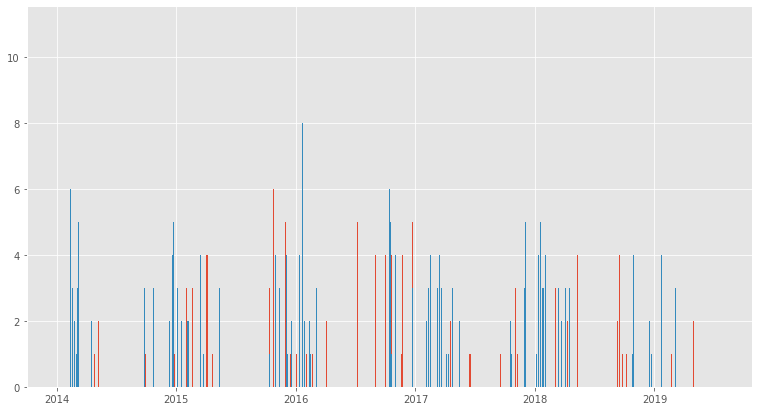

In [506]:
wetlst=[]
for i in list(wetthirtysixkeys):
    wetlst.append(i.time())

fig, ax = plt.subplots(1, figsize=(13, 7))
ax.bar(list(wetthirtysixkeys),list(wetthirtysixvalues))
#ax.plot(list(drthirtysixkeys),list(drythirtysixvalues))
ax.bar(list(wetfourhourskeys),list(wetfourhoursvalues))

<BarContainer object of 1 artists>

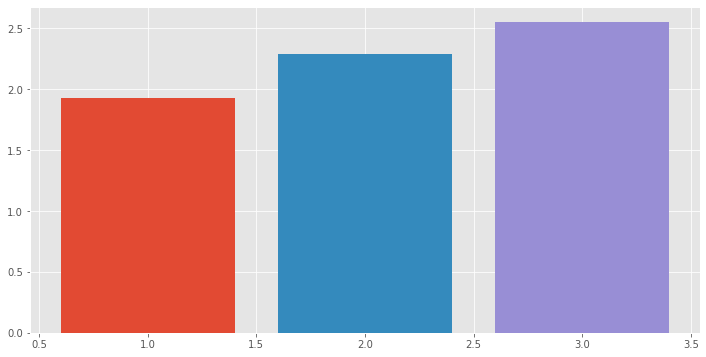

In [510]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.bar(1,np.mean(list(drythirtysixvalues)))
ax.bar(2,np.mean(list(wetthirtysixvalues)))
ax.bar(3,np.mean(list(wetfourhoursvalues)))

In [479]:
type(file2['INCDTTM'].iloc[[0]])

pandas.core.series.Series

In [481]:
file2['INCDTTM'].loc[0].time() != datetime.time(0,0)

False

In [274]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [278]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [618]:
df = welch_satterhwaithe_df(list(drythirtysixvalues),list(wetthirtysixvalues))
test_stat = welch_test_statistic(list(drythirtysixvalues),list(wetthirtysixvalues))
test_stat

-2.5866054456401675

In [619]:
students = stats.t(df)
pvalue = students.cdf(test_stat)

In [620]:
pvalue

0.0050560875546973539

In [621]:
df2 = welch_satterhwaithe_df(list(wetfourhoursvalues),list(wetthirtysixvalues))
df2

355.56797831337531

In [622]:
test_stat2 = welch_test_statistic(list(wetthirtysixvalues),list(wetfourhoursvalues))
test_stat2

0.58433744195651172

In [623]:
students2 = stats.t(df2)
pvalue2 = 1-students2.cdf(test_stat2)

In [624]:
pvalue2

0.27968192745496578

In [625]:
df3 = welch_satterhwaithe_df(list(wetfourhoursvalues),list(drythirtysixvalues))
df3

390.45736240162165

In [626]:
test_stat3 = welch_test_statistic(list(wetfourhoursvalues),list(drythirtysixvalues))
test_stat3

2.4780204423976238

In [627]:
students3 = stats.t(df3)
pvalue3 = 1-students3.cdf(test_stat3)

In [628]:
pvalue3

0.006816667177153346

In [95]:
from pymongo import MongoClient
import pprint

In [96]:
client = MongoClient('localhost', 27017)

In [97]:
db = client['WeatherDB']

In [98]:
Weather = db['Weather']

In [194]:
testcoll = db['testcoll']
PrecpIntAndProbHourly = db['PrecpIntAndProbHourly']

(1, 2)